In [1]:
! pip install opencv-python numpy matplotlib scikit-image

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference 0.9.17 requires opencv-python<=4.8.0.76, but you have opencv-python 4.11.0.86 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 670.4 kB/s eta 0:00:59
    --------------------------------------- 0.5/39.5 MB 670.4 kB/s eta 0:00:59
    --------------------------------------- 0.8/39.5 MB 699.0 kB/s eta 0:00:56
   - -------------------------------------- 1.0/39.5 MB 825.2 kB/s eta 0:00:47
   - -------------------------------------- 1.3/39.5 MB 932.1 kB/s eta 0:00:41
   - -------------------------------------- 1.6/39.5 MB 964.5 kB/s eta 0:00:40
   - -------------------------------------- 1.8/39.5 MB 986.7 kB/s eta 0:00:39
   - -------------------------------------- 1.8/39.5 MB 986.7 kB/s eta 0:00:39
   -- ------------------------------------- 2.1/39.5 MB 970.4 kB/s eta 0:00:39
   -- ------------------------------------- 2.4/39.5 MB 972.7 kB/s eta 0:00:39

### **1. Load And preprocess image**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load the image
image = cv2.imread('cv20.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
# Resize the image
image = cv2.resize(image, (128,128))

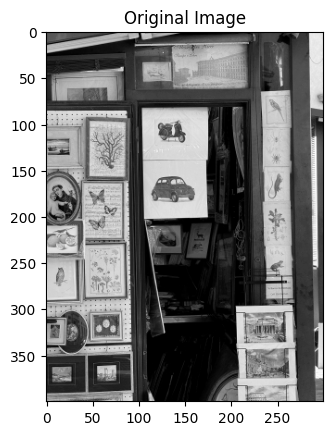

In [9]:
# Display the image
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')
plt.show()


### **2. Compute Gradients using SOBEL Operator**

In [ ]:
# gradients
grad_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Compute magnitude and orientation
magnitude = np.sqrt(grad_x**2 + grad_y**2)
orient = np.arctan2(grad_x, grad_y)*(180/np.pi)

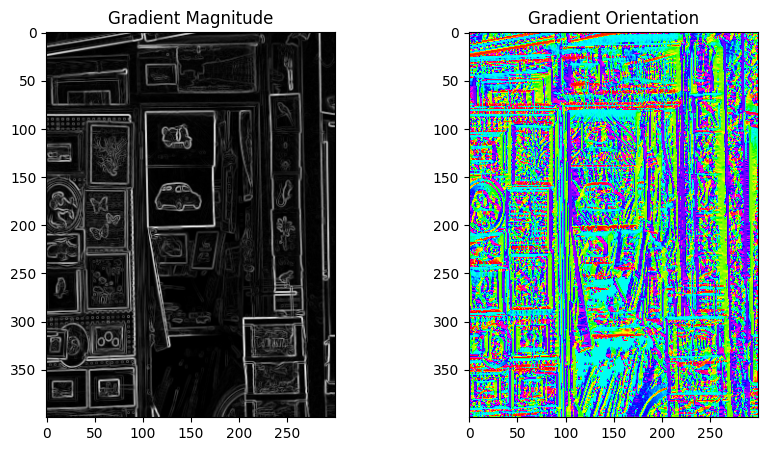

In [11]:
# Display the image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(magnitude, cmap = 'gray')
plt.title('Gradient Magnitude')
plt.subplot(1,2,2)
plt.imshow(orient, cmap='hsv')
plt.title('Gradient Orientation')

plt.show()


### **3. Compute HOG Features using scikit-image**

In [12]:
from skimage.feature import hog

In [15]:
# Compute HOG features 

hog_features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

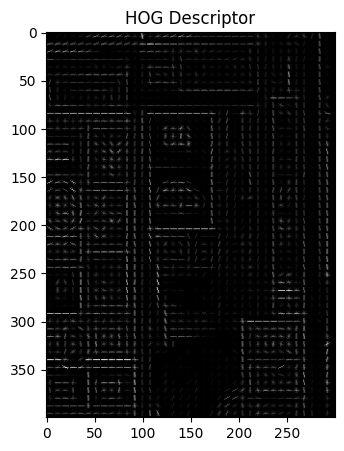

In [17]:
# Display the image using HOG features

plt.figure(figsize=(10,5))
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Descriptor')

plt.show()